In [28]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [29]:
# constant
length = 101e-10
num_points = 1000
a = length / (num_points+1)
alpha = 100
h_bar = 1.054571628e-34
m_e = 9.1095e-31
j_to_ev = 1 / 1.602176634e-19

In [30]:
# expression for eigen-energy
e_n_factor = h_bar**2 / (2 * m_e) * np.pi**2 / length**2 * j_to_ev
e_n = lambda n_: e_n_factor * n_**2

In [31]:
kronecker_delta = lambda i_, j_: 1 if i_ == j_ else 0

# construct Hamiltonian matrix
t0 = h_bar**2 / (2 * m_e * a**2) * j_to_ev
hamiltonian = np.zeros([num_points, num_points])
for index, x in np.ndenumerate(hamiltonian):
    i = index[0]
    j = index[1]
    hamiltonian[i, j] = 2*t0*kronecker_delta(i, j) - t0*kronecker_delta(i, j+1) - t0*kronecker_delta(i, j-1)

# get eigenvalue and eigenvector
w, v = la.eig(hamiltonian)

# sort both by eigenvalue
sort_index = np.argsort(w)
w = w[sort_index]
v = v[:, sort_index]

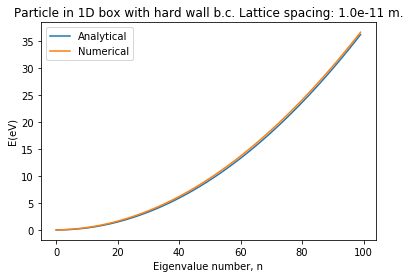

In [32]:
n = np.arange(0, alpha)
plt.plot(n, e_n(n), label='Analytical')
plt.plot(n, w[:alpha], label='Numerical')
plt.xlabel('Eigenvalue number, n')
plt.ylabel('E(eV)')
plt.legend()
plt.title(f'Particle in 1D box with hard wall b.c. Lattice spacing: {a:.1e} m.')
plt.show()

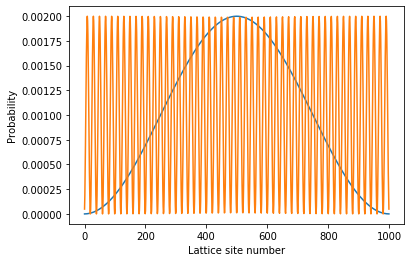

In [33]:
x = np.arange(0, num_points)
plt.plot(x, v[:, 0]**2)
plt.plot(x, v[:, 49]**2)
plt.xlabel('Lattice site number')
plt.ylabel('Probability')
plt.show()

In [34]:
# modify the hamiltonian for periodic b.c.
hamiltonian_periodic = hamiltonian.copy()
hamiltonian_periodic[0, -1] = -t0
hamiltonian_periodic[-1, 0] = -t0

# get eigenvalue and eigenvector
w_p, v_p = la.eig(hamiltonian)

# sort both by eigenvalue
sort_index_p = np.argsort(w_p)
w_p = w_p[sort_index_p]
v_p = v_p[:, sort_index_p]

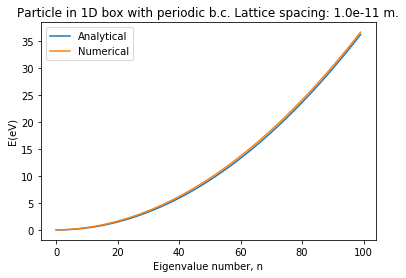

In [35]:
plt.plot(n, e_n(n), label='Analytical')
plt.plot(n, w_p[:alpha], label='Numerical')
plt.xlabel('Eigenvalue number, n')
plt.ylabel('E(eV)')
plt.legend()
plt.title(f'Particle in 1D box with periodic b.c. Lattice spacing: {a:.1e} m.')
plt.show()
